# MNIST with Convolutional Neural Networks

## Prerequisites

Install the following packages

In [3]:
try:
    from cloudmesh.common.StopWatch import StopWatch
except:  # noqa: E722
    ! pip install cloudmesh-common
    from cloudmesh.common.StopWatch import StopWatch

StopWatch.start('import')
! pip3 install cloudmesh-installer
! pip3 install cloudmesh-common
StopWatch.stop('import')

## Import Libraries

In [4]:
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

StopWatch.start('import')
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
StopWatch.stop('import')

## Download Data and Pre-Process

In [5]:
StopWatch.start('total')
StopWatch.start('data-load')
(x_train, y_train), (x_test, y_test) = mnist.load_data()
StopWatch.stop('data-load')

num_labels = len(np.unique(y_train))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

input_shape = (image_size, image_size, 1)
print(input_shape)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

(28, 28, 1)


## Define Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

2022-07-14 12:22:49.578849: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


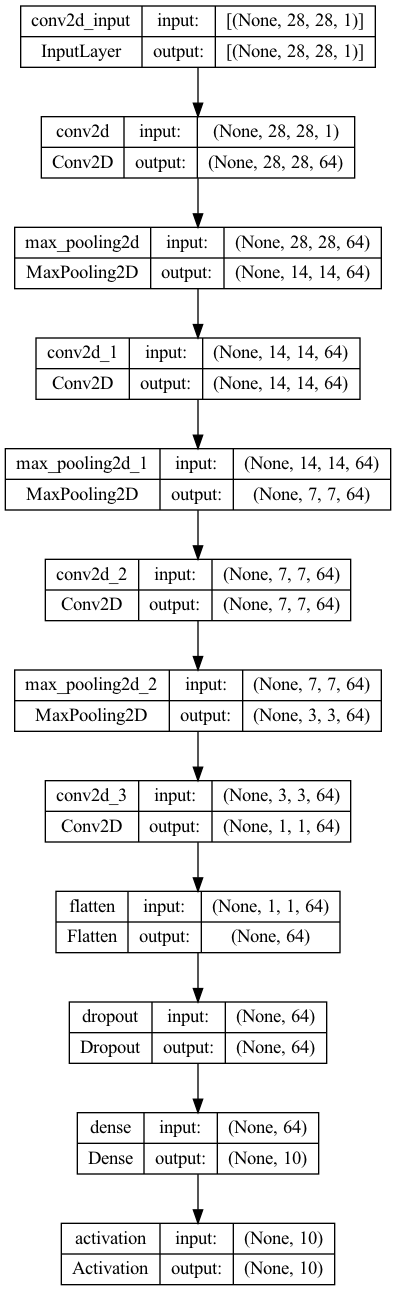

In [6]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# Train

In [7]:
StopWatch.start('compile')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
StopWatch.stop('compile')
# train the network
StopWatch.start('train')
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
StopWatch.stop('train')

Epoch 1/10
469/469 [==============================] - 45s 94ms/step - loss: 0.2896 - accuracy: 0.9112
Epoch 2/10
469/469 [==============================] - 46s 97ms/step - loss: 0.0799 - accuracy: 0.9766
Epoch 3/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0543 - accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0435 - accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0361 - accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 49s 105ms/step - loss: 0.0298 - accuracy: 0.9905
Epoch 7/10
469/469 [==============================] - 51s 108ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 8/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0213 - accuracy: 0.9933
Epoch 9/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0211 - accuracy: 0.9934
Epoch 10/10
469/469 [==============================] - 46s 98ms/step - loss:

## Test

In [8]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 2s 20ms/step - loss: 0.0295 - accuracy: 0.9917

Test accuracy: 99.2%
